In [1]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
### 使用 networkx 包中的函数 LFR_benchmark_graph 生成随机图
import networkx as nx
from networkx.generators.community import LFR_benchmark_graph

n = 1000
tau1 = 2  # Power-law exponent for the degree distribution
tau2 = 1.1 # Power-law exponent for the community size distribution 
            #S hould be >1
mu = 0.05 # Mixing parameter
avg_deg = 25 # Average Degree
max_deg = 100 # Max Degree
min_commu = 80 # Min Community Size
max_commu = 100 # Max Community Size

G = LFR_benchmark_graph(
    n, tau1, tau2, mu, average_degree=avg_deg, max_degree=max_deg, min_community=min_commu, max_community=max_commu, 
    seed=7
)
### 去掉 G 中的重边和自环 
G = nx.Graph(G) # Remove multi-edges

selfloop_edges = list(nx.selfloop_edges(G)) # a list of self loops

G.remove_edges_from(selfloop_edges) # Remove self-loops

In [3]:
import numpy as np
intrinsic_communities = {frozenset(G.nodes[v]["community"]) for v in G}
intrinsic_membership = np.empty(G.number_of_nodes(), dtype=int)
for node in range(G.number_of_nodes()):
    for index, inner_set in enumerate(intrinsic_communities):
        if node in inner_set:
            intrinsic_membership[node] = index
            break

In [4]:
remain_nodes = np.array(range(G.number_of_nodes()))
idx = [True] *(G.number_of_nodes())

In [5]:
betweenness = nx.betweenness_centrality(G)
temp = sorted(betweenness, key=betweenness.get, reverse=True)

In [6]:
from auxpack.eval_embd import eval_embd as EE
from clusim.clustering import Clustering

D=20

In [7]:
from auxpack.lle import lle
from auxpack.eval_embd import eval_embd as EE

scores=[]
for i in temp:
    G.remove_node(i)
    print(f"Vertex {i} is removed.", end=' ')
    if not nx.is_connected(G):
        print(temp.index(i), "vertices are removed. G is now disconnected!!")
        break
    embd = lle(G, D)
    idx[i] = False
    intrin_list = intrinsic_membership[idx]
    intrin_Clus = Clustering({i: [intrin_list[i]] for i in range(len(intrin_list))})
    K = len(np.unique(intrinsic_membership[idx]))
    score = EE(K,intrin_list,intrin_Clus, embd)
    scores.append(score)
    print("NMI&ECS:", score)

Vertex 661 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 822 is removed. NMI&ECS: [1.0000000000000002, 1.0, 1.0, 1.0]
Vertex 979 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 39 is removed. NMI&ECS: [1.0000000000000002, 1.0, 1.0, 1.0]
Vertex 853 is removed. NMI&ECS: [1.0000000000000002, 1.0, 1.0, 1.0]
Vertex 888 is removed. NMI&ECS: [0.9695814362175421, 0.9999999999999998, 0.9202579608083282, 1.0]
Vertex 57 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 252 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 40 is removed. NMI&ECS: [0.9999999999999998, 0.9999999999999998, 1.0, 1.0]
Vertex 591 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 652 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 352 is removed. NMI&ECS: [1.0000000000000002, 1.0, 1.0, 1.0]
Vertex 917 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 356 is removed. NMI&ECS: [0.9999999999999998, 0.9999999999999998, 1.0, 1.0]
Vertex 297 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 274 is removed. NMI&ECS: [1.0, 1.0, 

Vertex 333 is removed. NMI&ECS: [0.9610385813338553, 1.0000000000000002, 0.867227587302303, 1.0]
Vertex 632 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 89 is removed. NMI&ECS: [0.9732414365667669, 1.0, 0.9319665686447693, 1.0]
Vertex 921 is removed. NMI&ECS: [0.9744562106479746, 1.0, 0.9364224212665323, 1.0]
Vertex 75 is removed. NMI&ECS: [0.9802552745955923, 1.0, 0.954659011967022, 1.0]
Vertex 812 is removed. NMI&ECS: [0.9676092749144536, 1.0, 0.9103552077644934, 1.0]
Vertex 459 is removed. NMI&ECS: [1.0, 1.0000000000000002, 1.0, 1.0]
Vertex 713 is removed. NMI&ECS: [0.9693762159382848, 1.0, 0.9179414105194531, 1.0]
Vertex 796 is removed. NMI&ECS: [0.9799911977660297, 1.0, 0.9542104104514435, 1.0]
Vertex 158 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 687 is removed. NMI&ECS: [1.0, 1.0, 1.0, 1.0]
Vertex 506 is removed. NMI&ECS: [0.9621365354323769, 1.0, 0.8714336345915293, 1.0]
Vertex 416 is removed. NMI&ECS: [1.0, 0.9999999999999998, 1.0, 1.0]
Vertex 775 is removed. NMI&ECS

Vertex 715 is removed. NMI&ECS: [1.0, 0.9968175652573821, 1.0, 0.9956175473094313]
Vertex 837 is removed. NMI&ECS: [1.0, 0.9968127426668811, 1.0, 0.9956110354926548]
Vertex 491 is removed. NMI&ECS: [1.0000000000000002, 0.9968081019599093, 1.0, 0.9956045042954713]
Vertex 262 is removed. NMI&ECS: [1.0, 0.9968034196108327, 1.0, 0.995597953631232]
Vertex 655 is removed. NMI&ECS: [0.9635691385726239, 0.9967987264758487, 0.8809777111602181, 0.9955913834127712]
Vertex 319 is removed. NMI&ECS: [1.0, 0.996793990778183, 1.0, 0.9955847935524017]
Vertex 639 is removed. NMI&ECS: [1.0, 0.9967891788056814, 1.0, 0.9955781839619112]
Vertex 486 is removed. NMI&ECS: [1.0, 0.9967842877383766, 1.0, 0.9955715545525589]
Vertex 25 is removed. NMI&ECS: [0.9766581415849659, 0.996779418981812, 0.9500817735258705, 0.9955649052350701]
Vertex 614 is removed. NMI&ECS: [1.0, 0.9967747329762471, 1.0, 0.9955582359196342]
Vertex 121 is removed. NMI&ECS: [1.0, 0.9967699411895554, 1.0, 0.9955515465158987]
Vertex 930 is re

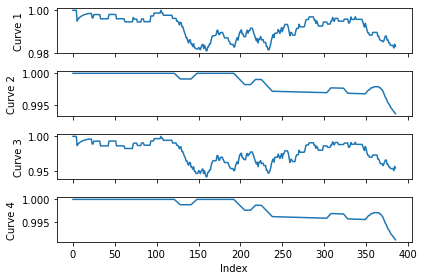

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

data = scores

# Extract x and y coordinates for each curve
x = range(len(data))  # Use the length of data as x-coordinates
y = list(zip(*data))  # Transpose the data matrix

# Compute rolling mean with a window size of 5
y_smoothed = [pd.Series(curve).rolling(window=20, min_periods=1).mean() for curve in y]

# Create subplots
fig, axs = plt.subplots(len(y_smoothed), 1, sharex=True)

# Plot each curve with smoothed data on a separate subplot
for i, curve in enumerate(y_smoothed):
    axs[i].plot(x, curve)
    axs[i].set_ylabel(f'Curve {i+1}')

# Add x-axis label to the last subplot
axs[-1].set_xlabel('Index')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

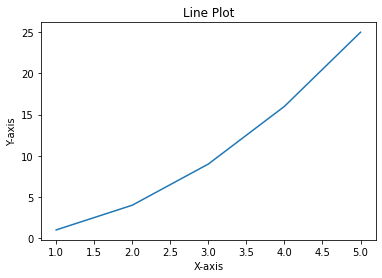

In [1]:
import matplotlib.pyplot as plt

# Prepare the data
x = [1, 2, 3, 4, 5]
y = [1, 4, 9, 16, 25]

# Create a line plot
plt.plot(x, y)

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Line Plot')


plt.savefig('plot.png')  # Save the plot as a PNG file
# Display the plot
plt.show()